In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from scipy.stats import beta, gamma, norm, lognorm

In [2]:
# Generar una muestra aleatoria de intensidades de viento
sample = np.array([1.2, 2.4, 3.1, 4.8, 5.5, 6.7, 7.3, 8.2, 9.1, 10.3, 11.5, 12.7, 13.8, 15.1, 16.3, 17.5, 18.8, 20.2])

# Estimación de los parámetros de la distribución Beta
params_beta = beta.fit(sample)
print("Distribución Beta: alpha = {:.2f}, beta = {:.2f}".format(params_beta[0], params_beta[1]))

# Estimación de los parámetros de la distribución Gamma
params_gamma = gamma.fit(sample)
print("Distribución Gamma: a = {:.2f}, loc = {:.2f}, scale = {:.2f}".format(params_gamma[0], params_gamma[1], params_gamma[2]))

# Estimación de los parámetros de la distribución Normal
params_norm = norm.fit(sample)
print("Distribución Normal: loc = {:.2f}, scale = {:.2f}".format(params_norm[0], params_norm[1]))

# Estimación de los parámetros de la distribución Log-Normal
params_lognorm = lognorm.fit(sample)
print("Distribución Log-Normal: s = {:.2f}, loc = {:.2f}, scale = {:.2f}".format(params_lognorm[0], params_lognorm[1], params_lognorm[2]))


Distribución Beta: alpha = 0.84, beta = 0.77
Distribución Gamma: a = 43.60, loc = -27.31, scale = 0.86
Distribución Normal: loc = 10.25, scale = 5.67
Distribución Log-Normal: s = 0.15, loc = -27.82, scale = 37.64


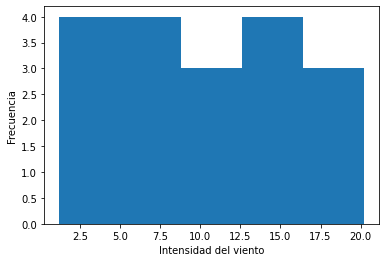

In [5]:
plt
plt.hist(sample, bins=5)
plt.xlabel('Intensidad del viento')
plt.ylabel('Frecuencia')
plt.show()

Distribución Beta: alpha = 0.84, beta = 0.77
Distribución Gamma: a = 43.60, loc = -27.31, scale = 0.86
Distribución Normal: loc = 10.25, scale = 5.67
Distribución Log-Normal: s = 0.15, loc = -27.82, scale = 37.64
Test de Kolmogorov-Smirnov para la distribución : KS statistic = 0.106, p-value = 0.974
Test de Kolmogorov-Smirnov para la distribución : KS statistic = 0.088, p-value = 0.997
Test de Kolmogorov-Smirnov para la distribución : KS statistic = 0.087, p-value = 0.997
Test de Kolmogorov-Smirnov para la distribución : KS statistic = 0.087, p-value = 0.997


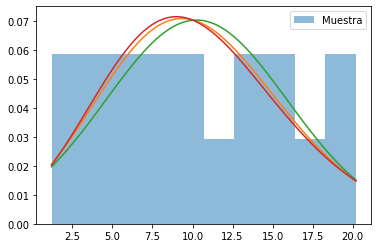

In [14]:
import numpy as np
from scipy.stats import beta, gamma, norm, lognorm
import matplotlib.pyplot as plt

# Generar una muestra aleatoria de intensidades de viento
sample = np.array([1.2, 2.4, 3.1, 4.8, 5.5, 6.7, 7.3, 8.2, 9.1, 10.3, 11.5, 12.7, 13.8, 15.1, 16.3, 17.5, 18.8, 20.2])

# Estimación de los parámetros de la distribución Beta
params_beta = beta.fit(sample)
print("Distribución Beta: alpha = {:.2f}, beta = {:.2f}".format(params_beta[0], params_beta[1]))

# Estimación de los parámetros de la distribución Gamma
params_gamma = gamma.fit(sample)
print("Distribución Gamma: a = {:.2f}, loc = {:.2f}, scale = {:.2f}".format(params_gamma[0], params_gamma[1], params_gamma[2]))

# Estimación de los parámetros de la distribución Normal
params_norm = norm.fit(sample)
print("Distribución Normal: loc = {:.2f}, scale = {:.2f}".format(params_norm[0], params_norm[1]))

# Estimación de los parámetros de la distribución Log-Normal
params_lognorm = lognorm.fit(sample)
print("Distribución Log-Normal: s = {:.2f}, loc = {:.2f}, scale = {:.2f}".format(params_lognorm[0], params_lognorm[1], params_lognorm[2]))

# Crear un histograma de la muestra
plt.hist(sample, density=True, alpha=0.5, label='Muestra')

# Crear una lista con las distribuciones a graficar
distributions = [(beta, params_beta), (gamma, params_gamma), (norm, params_norm), (lognorm, params_lognorm)]

# Graficar las distribuciones en la misma figura que el histograma
for dist, params in distributions[1:]:
    #dist_name = dist.__name__
    x = np.linspace(sample.min(), sample.max(), 100)
    y = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    plt.plot(x, y)

from scipy.stats import kstest

# Realizar el test de Kolmogorov-Smirnov para cada distribución
ks_stats = []
p_values = []
for dist, params in distributions:
    ks_statistic, p_value = kstest(sample, dist.cdf, args=params)
    ks_stats.append(ks_statistic)
    p_values.append(p_value)

# Imprimir los resultados del test
for i, (dist, _) in enumerate(distributions):
    print("Test de Kolmogorov-Smirnov para la distribución : KS statistic = {:.3f}, p-value = {:.3f}".format(ks_stats[i], p_values[i]))


plt.legend()
plt.show()